# Problem Set 2

Related lectures: [Control Flow](https://datascience.quantecon.org/../python_fundamentals/control_flow.html), [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html), and [Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html)

> Group members: 
>
> Wanxin Luo (33432808) Section 003
> 
> Tony Liang (39356993) Section 004

We first tried problem by ourselves, and compared our solutions after finishing the assignment to check anywhere that we might have mismatched for certain questions (i.e. not getting same output), and solutions were combined to one `.ipynb`file.

## Question 1
For the tuple `foo` below, use a combination of `zip`, `range`, and `len` to mimic `enumerate(foo)`.

Verify that your proposed solution is correct by converting each to a list and checking equality with `==`

HINT: You can see what the answer should look like by starting with `list(enumerate(foo))`.

In [1]:
foo = ("good", "luck!")
# Your code goes here
expected = list(enumerate(foo))
actual = list(zip(range(len(foo)), foo))

# Output the solution and comparet them
print(f"This is list(enumerate(foo)): {expected}")
print(f"This is my solution: {actual}")
print(f"Evaluating comparison: {expected == actual}")

This is list(enumerate(foo)): [(0, 'good'), (1, 'luck!')]
This is my solution: [(0, 'good'), (1, 'luck!')]
Evaluating comparison: True


## Question 2

Write a for loop that uses the lists of cities and states to print a message saying `“{city} is in {state}”`, where `{city}` and `{state}` are replaced by different values on each iteration.  You are *not* allowed to use `zip`.

In [2]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

# Your code here
for i, city in enumerate(cities):
    state = states[i]
    print(f"{city} is in {state}")

Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Now, do the same thing with a `for` loop using `zip`.

In [3]:
cities = ["Phoenix", "Austin", "San Diego", "New York"]
states = ["Arizona", "Texas", "California", "New York"]

# Your code here
for c, s in zip(cities, states):
    print(f"{c} is in {s}")
            

Phoenix is in Arizona
Austin is in Texas
San Diego is in California
New York is in New York


Write a function that takes in a tuple as `(city, state)` and returns a string  `“{city} is in {state}”` with the values substituted.

In [4]:
# Your function here
def city_in_state(tup: tuple):
    """
    Takes a tuple object (city, state)
    Returns “{city} is in {state}”
    """
    return(f"{tup[0]} is in {tup[1]}")
    
city_in_state(tup = ("Phoenix", "Arizona"))

'Phoenix is in Arizona'

## Question 3

This exercise explores the concept of higher order functions, or functions
that can be an input or output of another function.

Below is code that implements a version of the generalized Cobb-Douglas production function which takes the form $ F(K, L) = z K^{\alpha_1} L^{\alpha_2} $.

It takes as an argument `alpha_1`, `alpha_2`, and `z` and then
*returns a function* that implements that parameterization of the
Cobb-Douglas production function.

In [5]:
def cobb_douglas_factory(alpha_1, alpha_2, z=1.0):
    """
    Return a function F(K, L) that implements the generalized Cobb-Douglas
    production function with parameters alpha_1, alpha_2, and z

    The returned function takes the form F(K, L) = z K^{\alpha_1} L^{\alpha_2}
    """
    # I'm defining a function inside a function
    def return_func(K, L):
        return z * K**alpha_1 * L**alpha_2

    # Notice I'm returning a function! :mind_blown:
    return return_func

We can use this function in two steps:

1. Call it with `alpha_1`, `alpha_2`, and `z` and get a function in return.  
1. Call the returned function with values of `K` and `L`.  


Here’s how we would repeat the first Cobb-Douglas example from above:

In [6]:
# step 1
F2 = cobb_douglas_factory(0.33, 1-0.33)

# step 2
F2(1.0, 0.5)

0.6285066872609142

Now, it is your turn…

Re-write the `returns_to_scale` function above as we had in [Functions](https://datascience.quantecon.org/../python_fundamentals/functions.html) to accept an additional argument
`F` that represents a production function. The function should take in `K` and `L`
and return output.

We’ve written some code below to get you started.

In [7]:
# This is a function from lecture slides
def cobb_douglas(K, L):
    """
    Computes F(K,L), restricting z = 1, alpha = 0.33
    """
    z = 1.0
    alpha = 0.33
    return z * K**alpha * L**(1 - alpha)

In [8]:
# Own defined `returns_to_scale` function
def returns_to_scale2(F, K, L, gamma):
    """
    Takes in generic production function that consumes K, L, and extra param gamma
    calculates the return to scale of the production function
    """
    # Calculates the returns
    y1 = F(K, L)
    y2 = F(gamma * K, gamma * L)
    ratio = y2 / y1
    return ratio / gamma

Test out your new function using the original `F2` that we defined above and
using the `cobb_douglas` function defined earlier in the lecture. You can use
similar sets of values to what we used in class for `K` and `L`.

Do you get the same answer?

In [9]:
# test returns_to_scale2 with F2 and cobb_douglas as input

# Note alpha1 and alpha2 here 0.33 and 0.77 respectively
gamma = 2.0
test_f2 = returns_to_scale2(F2, K=1.0, L=0.5, gamma=gamma)
test_cd = returns_to_scale2(cobb_douglas, K=1.0, L=0.5, gamma=gamma)
# compare the two results
print(f"This is F2: {test_f2} \nThis is cobb_doublas: {test_cd}")
print(f"The two values are equal: {test_f2 == test_cd}")

This is F2: 1.0 
This is cobb_doublas: 1.0
The two values are equal: True


The answer we get here with `return_to_scale2` is the same one as we got earlier, since we used the same production function and parameters like `K`, `L` and `gamma`.

## Question 4

Let’s use our `cobb_douglas_factory` and `returns_to_scale2` functions
to study returns to scale.

What are the returns to scale when you set `alpha_1 = 0.3` and `alpha_2 = 0.6`?

In [10]:
# test with alpha_1 = 0.3 and alpha_2 = 0.6
F3 = cobb_douglas_factory(alpha_1=0.3, alpha_2=0.6)
returns_to_scale2(F3,K=1, L=0.5, gamma=2)

0.9330329915368075

What about when you use `alpha_1 = 0.4` and `alpha_2 = 0.65`?

In [11]:
# test with alpha_1 = 0.4 and alpha_2 = 0.65
F4 = cobb_douglas_factory(alpha_1=0.4, alpha_2=0.65)
returns_to_scale2(F4, K=1, L=0.5, gamma=gamma)

1.0352649238413774

What do returns to scale have to do with the quantity $ \alpha_1 + \alpha_2 $? When will returns to scale be greater or less than 1?

Keeping all other parameters constant (i.e. `K`, `L`, `gamma`), changing $\alpha_1$ and $\alpha_2$ results in the following result:

 $$ \text{return_to_scale}=   \left\{
\begin{array}{ll}
      > 1 & \alpha_1 + \alpha_2 \in (1, +\infty) \\
        1 & \alpha_1 + \alpha_2 = 1 \\
      < 1 & \alpha_1 + \alpha_2 \in (-\infty, 1) \\
\end{array} 
\right.  $$

Above piecewise function explains the return to scale upon different ranges of $\alpha_1 + \alpha_2$. When $\alpha_1 + \alpha_2 == 1$, the return to scale equals to 1, meaning constant returns to scale for give production function (this case, `cobb-douglas`). When $\alpha_1 + \alpha_2 > 1$, our production function has increasing returns to scale. Lastly, $\alpha_1 + \alpha_2 < 1$, we have decreasing returns to scale production function.


## Question 5

Take a production function of only labor, `L`, with the following form

$$
f(L) = \begin{cases} L^2 & \text{ for } L \in [0, 1)\\
                    \sqrt{L} & \text{ for } L \in [1, 2]
        \end{cases}
$$

Write a function to calculate the marginal product of labor (MPL) numerically by using a method similar to what we did in class.

In [12]:
def marginal_product_labor(L, eps):
    """
    Takes a production function of only labor, piecewise defined on [0,2]
    And calculates marginal product of labor numerically
    """
    if L >= 0 and L < 1:
        mpl = ((L + eps)**2 - L**2) / eps
        
    if L >= 1 and L <= 2:
        mpl = ((L + eps)**0.5 - L**0.5) / eps
    return mpl

Plot the MPL for $ L \in [0,2] $  (you can choose some sort of grid over those numbers with `np.linspace`).

In [13]:
# Import some libary
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

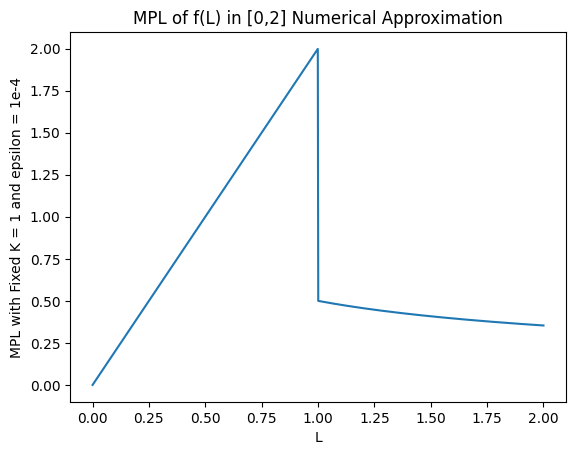

In [14]:
# Note K is defined earlier as 1, so we will use this fix K
fig, ax = plt.subplots()
# generate grids
Ls = np.linspace(0, 2, 1000)
y = [marginal_product_labor(L=L, eps=1e-4) for L in Ls]
# add title and labels
ax.set_title("MPL of f(L) in [0,2] Numerical Approximation")
ax.set_xlabel("L")
ax.set_ylabel("MPL with Fixed K = 1 and epsilon = 1e-4")
# plot it
ax.plot(Ls, y)

Consider the scenario where you increase the scale of production by a factor of 10 percent more labor. Plot the returns to scale for a grid on $ L \in [0, 1.5] $.
*Hint:* For this, you may need to write your own version of the `returns_to_scale` function specific to this production function or carefully use the one above. Either way of implementation is fine.

In [15]:
# your code here

# slight lightly modified returns to scale
# given production function only takes in labor
def returns_to_scale_10per(L, gamma):
    
    # restricting the L in domain of [0,2]
    # whereas it is defined differently upon different ranges
    if L >= 0 and L < 1:
        y1 = L**2
        y2 = (L*gamma)**2
    if L >= 1 and L<= 2:
        y1 =  L**(1/2)
        y2 = (L*gamma)**(1/2)
    y_ratio = y2 / y1
    return y_ratio / gamma

C:\Users\chunq\AppData\Local\Temp\ipykernel_32184\2596317376.py:15: RuntimeWarning: invalid value encountered in double_scalars
  y_ratio = y2 / y1


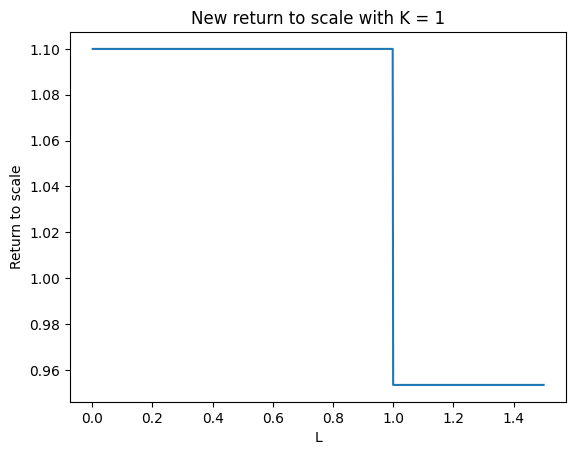

In [16]:
# New prlot by increasing scale of production by factor of 10 more labor
fig, ax = plt.subplots()
Ls2 = np.linspace(0, 1.5, 1000)
y2 = [returns_to_scale_10per(L=L, gamma=1.1) for L in Ls2]
ax.set_title("New return to scale with K = 1")
ax.set_xlabel("L")
ax.set_ylabel("Return to scale")
ax.plot(Ls2, y2)

Compare these returns to the scale of the Cobb-Douglas functions we have worked with.

The returns to scale here is similar to the one of `cobb-Douglas`earlier, whereas it only has increasing returns to scale or decreasing returns to scale on a specific range of value. Here, we specified to have $L \in [0, 1.5]$, and we can see from the plot above, the returns to scale is only > 1 when L is less than 1, otherwise the return to scale is < 1. And, this is similar to the `cobb-douglas` that it is only increasing/decreasing on an interval of values (i.e. relation with $\alpha_1 + \alpha_2$).

## Question 6

Define a function that takes as input a list $y$ *of arbitrary length* that contains the monthly returns of an asset, (where each element in the list represents the returns in that month) along with a keyword argument for your monthly discount rate with the default value $r=0.05$, and returns the present daily value of the asset.

In [17]:
# your code here

# Takes input a list of monthly returns of an asset
# monthly discount rate default to 0.05
def asset_val(y, r=0.05):
    total = 0
    n = len(y)
    for i in range(n):
        total = total + (1/(1+r))**i * y[i]
    return total

Use your function to answer the following question:

If you had a monthly discount factor of $r=0.1$, what is the most that you should pay for an asset that pays dividends of: $\$1$ immediately when purchasing, $\$10$ after the first month, $\$14$ after the second month, $\$18$ after three months, and finally $\$100$ after six months?

In [18]:
# your code here
y = [1, 10, 14, 18, 0, 0, 100]
# override the default r of 0.05
asset_val(y = y, r = 0.1)

91.63221644639953